# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **sports or athletics** (see below) for the region of **Wheaton, Illinois, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Wheaton, Illinois, United States** to Ann Arbor, USA. In that case at least one source file must be about **Wheaton, Illinois, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Wheaton, Illinois, United States** and **sports or athletics**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **sports or athletics**?  For this category we are interested in sporting events or athletics broadly, please feel free to creatively interpret the category when building your research question!

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

In [1]:
#import bs4 as bs
#import datetime as dt 
import os
import matplotlib.pyplot as plt 
from matplotlib import style
import numpy as np 
import pandas as pd 
#import pickle
#import requests
import sys
from functools import reduce
#import seaborn
%matplotlib inline

## Create functions

In [2]:

def create_initial_dataframe(team, dct):
    """
    Retrieve dataframes from wikipedia and select the most suitable dataframe
    based on the information given by the dictionary. 
    
    I tested every wikitable separately to create the dictionary "dct".  Additional 
    dataframes should be aggreated into the dictionary to make this function work
    
    """
    page = 'https://en.wikipedia.org/wiki/List_of_Chicago_{}_seasons'.format(team)
    wikitables = pd.read_html(page, flavor='bs4')
    table =wikitables[dct[team]]
    df = pd.DataFrame(table)
    return df


#df = bulls_initial

def bulls_customized_table(df):
    """
    This function makes readable the initial dataframe by pulling just the necessary information
    as well as setting labels for each attribution/column and create a variable called year, if needed.
    Finally a csv is created in case this is needed for future references.
    
    """
    df = df.loc[:,:8]
    df = df.copy()
    df.columns = df.iloc[0]
    df = df.loc[1:]
    df['Year'] = df['Season'].astype(str).str[:4]
    df.to_csv('bulls_dataframe.csv', index = False)
    return df


#df = bears_initial

def bears_customized_table(df):
    """
    This function makes readable the initial dataframe by pulling just the necessary information
    as well as setting labels for each attribution/column and create a variable called year, if needed.
    Finally a csv is created in case this is needed for future references.
    
    """
    df = pd.DataFrame(df.loc[51:103,:9])
    # I included this as the resulting dataframe has no columns and just adding columns alone
    # resulted in a dataframe with NaN. By using row_stack I handled this problem
    df = pd.DataFrame(np.row_stack([df.columns, df.values]),
    columns=['Year', 'Season', 'League','Conference', 'Division','Finish', 'Wins', 'Losses', 'Ties', 'Win%'])
    df = df[1:]
    df = df.copy()
    df.to_csv('bears_dataframe.csv', index = False)
    return df


#df = blackhawks_initial

def blackhawks_customized_table(df):
    """
    This function makes readable the initial dataframe by pulling just the necessary information
    as well as setting labels for each attribution/column and create a variable called year, if needed.
    Finally a csv is created in case this is needed for future references.
    
    """ 
    df = df.loc[:,:10]
    df = df.copy()
    df.columns = df.iloc[0]
    df =  df.loc[42:94]
    df = df.dropna()
    df['Year'] = df['NHL season'].astype(str).str[:4]
    df.to_csv('blackhawks_dataframe.csv', index = False)
    return df


def cubs_customized_table(df):
    """
    This function makes readable the initial dataframe by pulling just the necessary information
    as well as setting labels for each attribution/column and create a variable called year, if needed.
    Finally a csv is created in case this is needed for future references.
    
    """ 
    df = df.loc[:,:8]
    df = df.copy()
    df.columns = df.iloc[0]
    df = df.loc[90:]
    df = df.dropna()
    df['Year'] = df['Season'].astype(str).str[:4]
    df.to_csv('cubs_dataframe.csv', index = False)
    return df


def white_sox_customized_table(df):
    """
    This function makes readable the initial dataframe by pulling just the necessary information
    as well as setting labels for each attribution/column and create a variable called year, if needed.
    Finally a csv is created in case this is needed for future references.
    
    """ 
    df = df.loc[:,:8]
    df = df.copy()
    df.columns = df.iloc[0]
    df = df.loc[68:]
    df = df.dropna()
    df['Year'] = df['Season'].astype(str).str[:4]
    df.to_csv('whitesox_dataframe.csv', index = False)
    return df


def calculate_blackhawks_Wins(df):
    """
    The data from wikipedia available in January 2019 does not have the winning ratio available.
    Therefore, this functions takes care of this important step.
    
    """
    df = df[['Year','W', 'L', 'T']].replace({'—': '0'})
    df = df.apply(pd.to_numeric) 
    df['Total'] = df['W'] + df['L'] + df['T']
    df['Win%'] = np.round(df['W'] / df['Total'],3)
    df = df[['Year', 'Win%']]
    return df


def into_a_single_dataframe(dfs):
    """
    By the moment this function is used, we have a list of all the readable dataframes we already collected.
    This function takes care of merging and formatting the resulting dataframe.
    The info from this dataframe will be used to create our graph.
    
    """
    df_final = reduce(lambda left,right: pd.merge(left,right,on='Year'), dfs)
    df_final = df_final.copy()
    df_final = pd.DataFrame(np.row_stack([df_final.columns, df_final.values]),
                        columns = ['Year','Bulls', 'Bears', 'Blackhawks', 'Cubs', 'White Sox'])
    df_final = np.round(df_final.loc[1:],3).apply(pd.to_numeric)
    df_final.to_csv('final_dataframe.csv', index = False)
    return df_final #.dtypes

def my_graph():
    """
    This function takes the final dataframe to graph the teams in Chicago
    
    """
    
    # Create graph canvas
    fig = plt.figure(figsize = (30, 20))
    ax = fig.add_subplot(111)
    
    # Create x and y parameters
    x = df_final['Year']
    bulls_plot = df_final['Bulls'].rolling(10).mean()
    bears_plot = df_final['Bears'].rolling(10).mean()
    blackhawks_plot = df_final['Blackhawks'].rolling(10).mean()
    cubs_plot = df_final['Cubs'].rolling(10).mean()
    white_sox_plot = df_final['White Sox'].rolling(10).mean()
    
    # Plot each line
    plt.plot(x, bulls_plot, label = 'Bulls', linewidth = 5)
    plt.plot(x, bears_plot, label = 'Bears', linewidth = 5)
    plt.plot(x, blackhawks_plot, label = 'Blackhawks', linewidth = 5)
    plt.plot(x, cubs_plot, label = 'Cubs', linewidth = 5)
    plt.plot(x, white_sox_plot, label = 'White Sox', linewidth = 5, color = 'grey')
    
    # Create threshold variables
    threshold_three = 0.75
    threshold_two = 0.5
    threshold_one = 0.25
    
    # Plot thresholds
    ax.axhline(y = threshold_three, color= 'grey', linestyle = '--')
    ax.axhline(y = threshold_two, color= 'grey', linestyle = '--')
    ax.axhline(y = threshold_one, color= 'grey', linestyle = '--')
    
    # Define y limits for y.  I used 0 and 1 as the graph had it y axis truncated, which 
    # gave a skewed perspective to the graph
    plt.ylim([0, 1])
    
    # Create labels, titles and legends
    plt.xlabel('Year', fontsize = 26)
    plt.ylabel('10 Year Moving Average Win%', fontsize = 26)
    plt.title('Sports Teams Performance in Chicago \n 10 Year Moving Average 1979 - 2017', fontsize = 33)
    plt.legend(loc = 'best', frameon= False, fontsize= 20)
    
    # Adjust tick axis size and spines
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tick_params(axis='both', which='minor', labelsize=8)
    
    for i in list(['top', 'right', 'bottom', 'left']):
        plt.gca().spines[i].set_visible(False)
    
    # Save the resulting graph as a jpg file
    fig.savefig('Sports_In_Chicago.jpg')
    
    plt.show()
    
    return

## Create variables

In [3]:
#page = 'https://en.wikipedia.org/wiki/List_of_Chicago_{}_seasons'.format(team)
dct = {"Bulls": 2, "Bears": 2, "Blackhawks": 1, "Cubs": 1, "White_Sox": 2}
bulls = "Bulls"
bears = "Bears"
blackhawks = "Blackhawks"
cubs = "Cubs"
white_sox = "White_Sox"


## Create initial dataframes

In [4]:
bulls_initial = create_initial_dataframe(bulls, dct)
bears_initial = create_initial_dataframe(bears, dct)
blackhawks_initial = create_initial_dataframe(blackhawks, dct)
cubs_initial = create_initial_dataframe(cubs, dct)
white_sox_initial = create_initial_dataframe(white_sox, dct)

## Create cleaned dataframes

In [5]:
bulls_readable = bulls_customized_table(bulls_initial)
bears_readable = bears_customized_table(bears_initial)
blackhawks_readable = blackhawks_customized_table(blackhawks_initial) 
cubs_readable = cubs_customized_table(cubs_initial)
white_sox_readable = white_sox_customized_table(white_sox_initial)
white_sox_readable.head()

,Season,Level,League,Division,Finish,Won,Lost,Win%,GB,Year
71,1969,MLB,AL,West,5th,68,94,.420,29,1969
72,1970,MLB,AL,West,6th,56,106,.346,42,1970
73,1971,MLB,AL,West,3rd,79,83,.488,22½,1971
74,1972,MLB,AL,West,2nd,87,67,.565,5½,1972
75,1973,MLB,AL,West,5th,77,85,.475,17,1973


## Create dataframes for graph

In [6]:
bulls_to_graph = bulls_readable[['Year', 'Win%']].apply(pd.to_numeric)
bears_to_graph = bears_readable[['Year', 'Win%']].apply(pd.to_numeric)
blackhawks_to_graph = calculate_blackhawks_Wins(blackhawks_readable)
cubs_to_graph = cubs_readable[['Year', 'Win%']].apply(pd.to_numeric)
white_sox_to_graph = white_sox_readable[['Year', 'Win%']].apply(pd.to_numeric)
white_sox_to_graph.head()

,Year,Win%
71,1969,0.420
72,1970,0.346
73,1971,0.488
74,1972,0.565
75,1973,0.475


## Merge data into a single dataframe

In [7]:
dfs = [bulls_to_graph, bears_to_graph, blackhawks_to_graph, cubs_to_graph,white_sox_to_graph]
df_final = into_a_single_dataframe(dfs)
df_final.head()

,Year,Bulls,Bears,Blackhawks,Cubs,White Sox
1,1969.0,0.476,0.071,0.592,0.568,0.420
2,1970.0,0.622,0.429,0.628,0.519,0.346
3,1971.0,0.695,0.429,0.590,0.512,0.488
4,1972.0,0.622,0.321,0.538,0.548,0.565
5,1973.0,0.659,0.214,0.526,0.478,0.475


## Create Graph

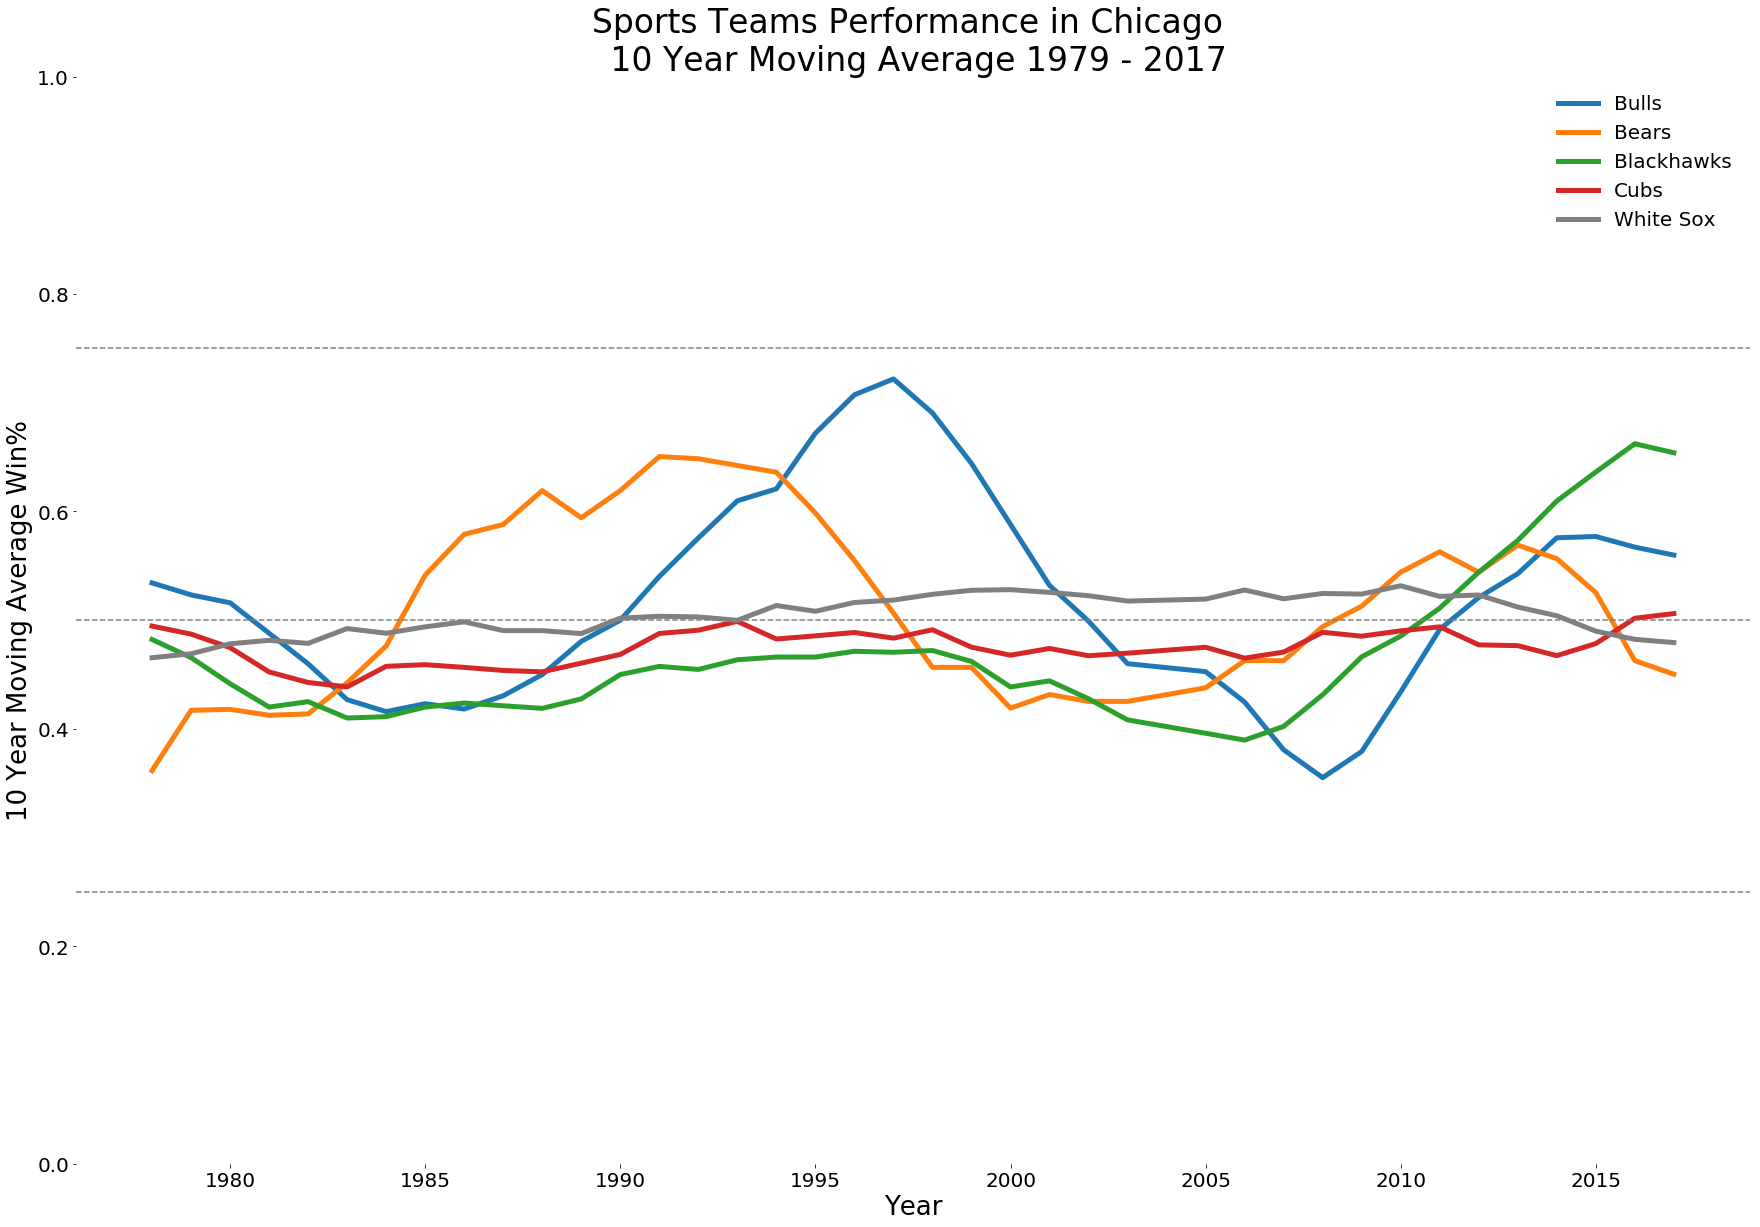

In [8]:
my_graph()

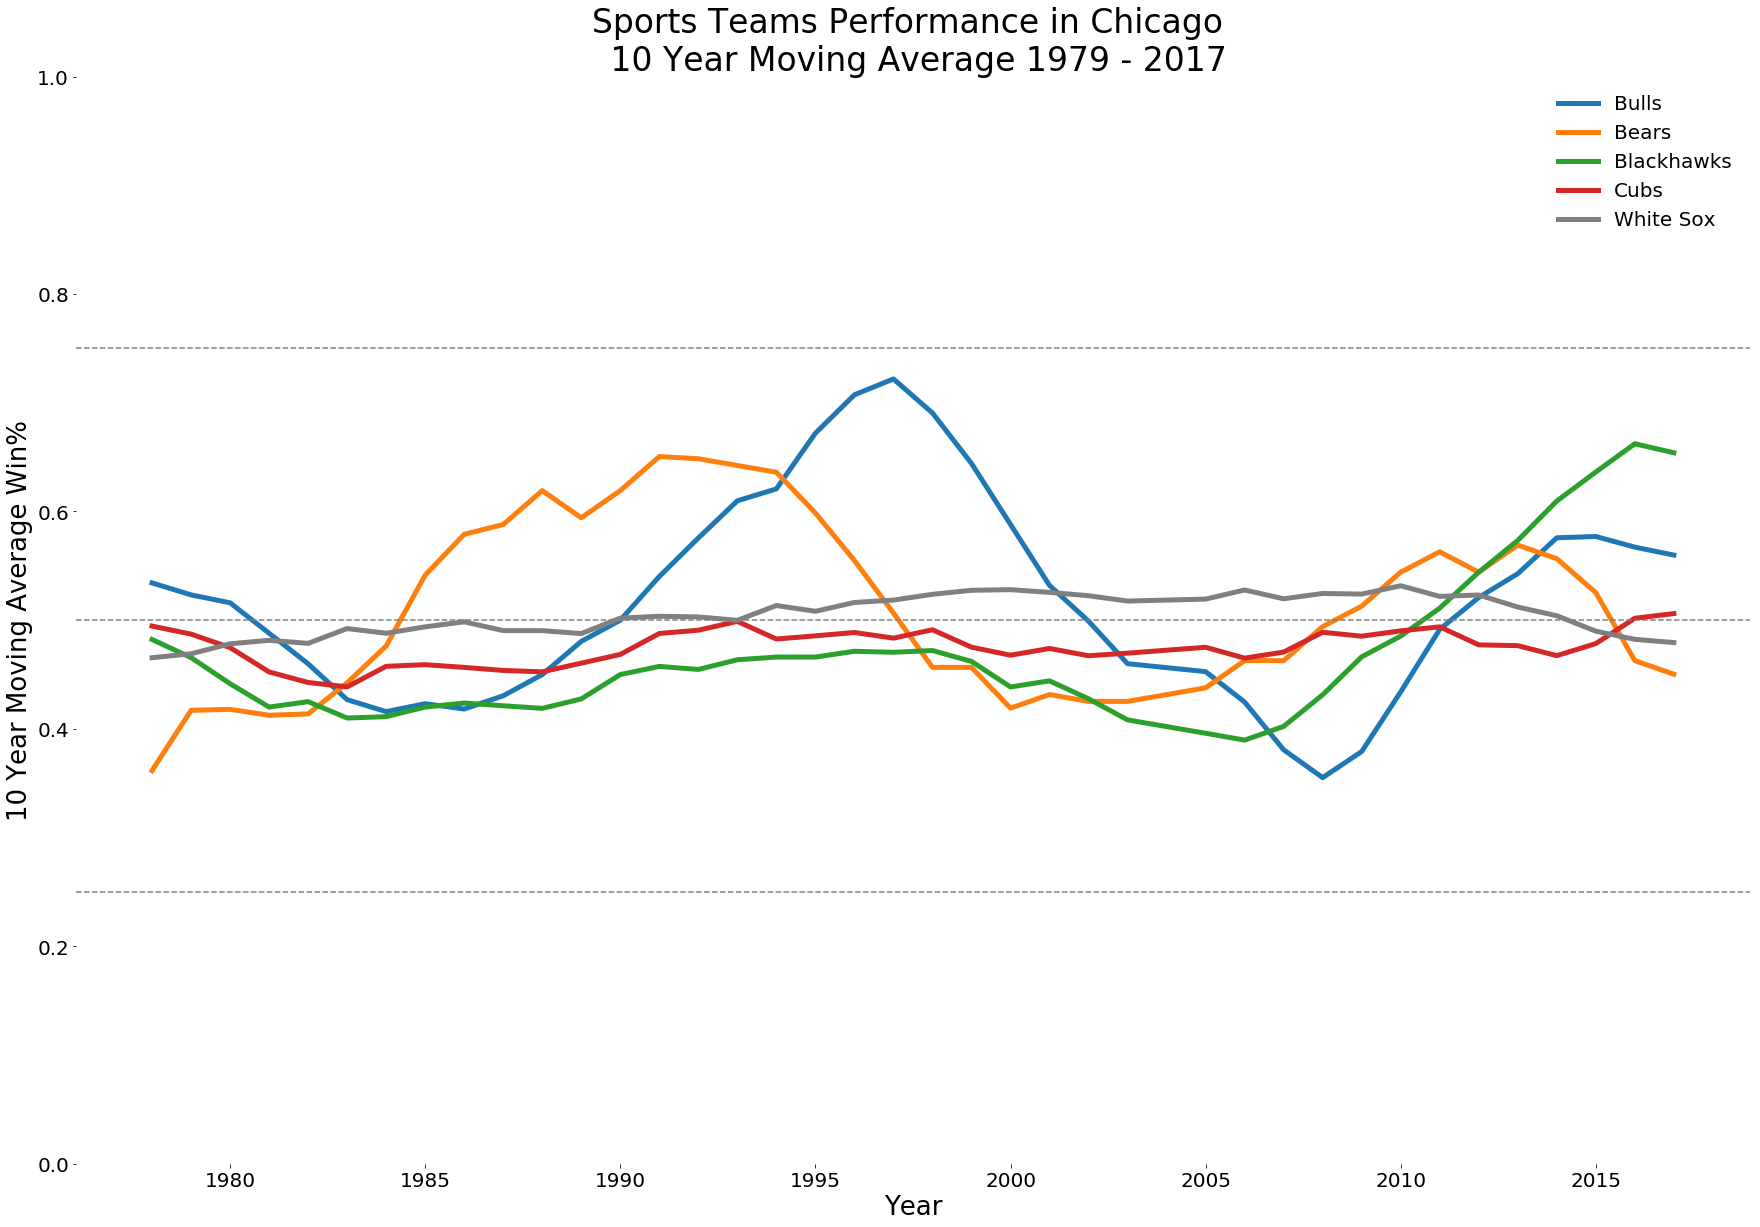

In [9]:
# Create graph canvas
fig = plt.figure(figsize = (30, 20))
ax = fig.add_subplot(111)

# Create x and y parameters
x = df_final['Year']
bulls_plot = df_final['Bulls'].rolling(10).mean()
bears_plot = df_final['Bears'].rolling(10).mean()
blackhawks_plot = df_final['Blackhawks'].rolling(10).mean()
cubs_plot = df_final['Cubs'].rolling(10).mean()
white_sox_plot = df_final['White Sox'].rolling(10).mean()

# Plot each line
plt.plot(x, bulls_plot, label = 'Bulls', linewidth = 5)
plt.plot(x, bears_plot, label = 'Bears', linewidth = 5)
plt.plot(x, blackhawks_plot, label = 'Blackhawks', linewidth = 5)
plt.plot(x, cubs_plot, label = 'Cubs', linewidth = 5)
plt.plot(x, white_sox_plot, label = 'White Sox', linewidth = 5, color = 'grey')

# Create threshold variables
threshold_three = 0.75
threshold_two = 0.5
threshold_one = 0.25

# Plot thresholds
ax.axhline(y = threshold_three, color= 'grey', linestyle = '--')
ax.axhline(y = threshold_two, color= 'grey', linestyle = '--')
ax.axhline(y = threshold_one, color= 'grey', linestyle = '--')

# Define y limits for y.  I used 0 and 1 as the graph had it y axis truncated, which 
# gave a skewed perspective to the graph
plt.ylim([0, 1])

# Create labels, titles and legends
plt.xlabel('Year', fontsize = 26)
plt.ylabel('10 Year Moving Average Win%', fontsize = 26)
plt.title('Sports Teams Performance in Chicago \n 10 Year Moving Average 1979 - 2017', fontsize = 33)
plt.legend(loc = 'best', frameon= False, fontsize= 20)

# Adjust tick axis size and spines
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=8)

for i in list(['top', 'right', 'bottom', 'left']):
    plt.gca().spines[i].set_visible(False)

# Save the resulting graph as a jpg file
fig.savefig('Sports_In_Chicago.jpg')
    
plt.show()

In [10]:
df_final['Bulls'].rolling(10).mean()

1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10    0.5343
11    0.5233
12    0.5160
13    0.4880
14    0.4599
15    0.4269
16    0.4159
17    0.4232
18    0.4183
19    0.4305
20    0.4500
21    0.4805
22    0.5000
23    0.5402
24    0.5756
25    0.6098
26    0.6208
27    0.6720
28    0.7073
29    0.7219
30    0.6906
31    0.6442
32    0.5881
33    0.5320
34    0.4991
35    0.4600
36    0.4527
37    0.4247
38    0.3808
39    0.3552
40    0.3792
41    0.4341
42    0.4916
43    0.5209
44    0.5428
45    0.5758
46    0.5770
47    0.5672
48    0.5599
Name: Bulls, dtype: float64

In [11]:
years = np.asarray(df_final['Year'].astype(int))
years

array([1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017])

In [12]:
np.arange(1969, 2017, 1)

array([1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016])

In [13]:
df_final.get("Bulls")

1     0.476
2     0.622
3     0.695
4     0.622
5     0.659
6     0.573
7     0.293
8     0.537
9     0.488
10    0.378
11    0.366
12    0.549
13    0.415
14    0.341
15    0.329
16    0.463
17    0.366
18    0.488
19    0.610
20    0.573
21    0.671
22    0.744
23    0.817
24    0.695
25    0.671
26    0.573
27    0.878
28    0.841
29    0.756
30    0.260
31    0.207
32    0.183
33    0.256
34    0.366
35    0.280
36    0.500
37    0.598
38    0.402
39    0.500
40    0.500
41    0.756
42    0.758
43    0.549
44    0.585
45    0.610
46    0.512
47    0.500
48    0.329
Name: Bulls, dtype: float64

In [14]:
dfs = [bulls_to_graph, bears_to_graph, blackhawks_to_graph, cubs_to_graph,white_sox_to_graph]

# You can either use this:
df_final = reduce(lambda left,right: pd.merge(left,right,on='Year'), dfs)

#or this:
df = dfs[0]

for df_ in dfs[1:]:
    df = df.merge(df_, on = 'Year')
    
df.head()



,Year,Win%_x,Win%_y,Win%_x,Win%_y,Win%
0,1969,0.476,0.071,0.592,0.568,0.420
1,1970,0.622,0.429,0.628,0.519,0.346
2,1971,0.695,0.429,0.590,0.512,0.488
3,1972,0.622,0.321,0.538,0.548,0.565
4,1973,0.659,0.214,0.526,0.478,0.475


## Create dataframe for graph

In [15]:
blackhawks_to_graph = blackhawks_readable[['Year','W', 'L', 'T']].replace({'—': '0'})
blackhawks_to_graph = blackhawks_to_graph.apply(pd.to_numeric) # <-- CREATE A FUNCTION FOR BLACKHAWKS
blackhawks_to_graph['Total'] = blackhawks_to_graph['W'] + blackhawks_to_graph['L'] + blackhawks_to_graph['T']
blackhawks_to_graph['Win%'] = np.round(blackhawks_to_graph['W'] / blackhawks_to_graph['Total'],3)
blackhawks_to_graph

,Year,W,L,T,Total,Win%
42,1966,41,17,12,70,0.586
43,1967,32,26,16,74,0.432
44,1968,34,33,9,76,0.447
45,1969,45,22,9,76,0.592
46,1970,49,20,9,78,0.628
47,1971,46,17,15,78,0.590
48,1972,42,27,9,78,0.538
49,1973,41,14,23,78,0.526
50,1974,37,35,8,80,0.462
51,1975,32,30,18,80,0.400


In [16]:

page = 'https://en.wikipedia.org/wiki/University_of_California,_Berkeley'
infoboxes = pd.read_html(page, index_col=0, attrs={"class":"infobox"})
wikitables = pd.read_html(page, index_col=0, attrs={"class":"wikitable"})

wikitables[2]

,1,2,3,4,5,6,7,8
0,,,,,,,,
NaN,2018,2017,2016,2015,2014,2013,2012,2011
Applicants[173][174][175][176],89615,85057,82571,78923,73794,67713,61702,52953
Admits[173][174][175][176],13558,14552,14429,13332,13338,14181,13038,13523
Admit rate[173][174][175][176],15.1%,17.1%,17.5%,16.9%,18.1%,20.9%,21.1%,25.5%
Enrolled[173][177][178],6018,6379,6253,5832,5813,5848,5365,5640
SAT range [173][179][180][181][182][183][184],1340–1530,1300–1540,1930–2290,1870–2250,1840–2230,1870–2240,1840–2240,1870–2230
ACT average [173][179][180][181][182][183][184],32,32,32,32,31,30,30,31
GPA (unweighted) [173][179][180][181][182][183][184],3.92,3.91,3.86,3.87,3.85,3.86,3.84,3.83


In [17]:
page = 'https://en.wikipedia.org/wiki/List_of_Chicago_Bulls_seasons'
wikitables = pd.read_html(page, index_col=0, attrs={"class":"wikitable"})

wikitables[2]

,1,2,3
0,,,
Statistic,Wins,Losses,Win%
Chicago Bulls regular season record (1966–2018),2183,2032,.518
Chicago Bulls postseason record (1966–2018),186,157,.542
All-time regular and postseason record,2369,2189,.520


In [18]:
page = 'https://en.wikipedia.org/wiki/List_of_Chicago_Bulls_seasons'
wikitables = pd.read_html(page, flavor='bs4')
dct = {"Bulls": 2, "Bears": 2, "Blackhawks": 1, "Cubs": 1, "White_Sox": 2}
table =wikitables[dct["Bulls"]]
df = pd.DataFrame(table)
df = df.loc[:,:8]
df = df.copy()
df.columns = df.iloc[0]
df = df.loc[1:]
df.to_csv('bulls_dataframe.csv', index = False)
df['Year'] = df['Season'].astype(str).str[:4]
df #.dtypes

,Season,Conference,Finish,Division,Finish,Wins,Losses,Win%,GB,Year
1,1966–67,—,—,Western,4th,33,48,.407,11,1966
2,1967–68,—,—,Western,4th,29,53,.354,27,1967
3,1968–69,—,—,Western,5th,33,49,.402,22,1968
4,1969–70,—,—,Western,3rd[c],39,43,.476,9,1969
5,1970–71,Western,3rd,Midwest[d],2nd,51,31,.622,2,1970
6,1971–72,Western,3rd,Midwest,2nd,57,25,.695,6,1971
7,1972–73,Western,3rd,Midwest,2nd,51,31,.622,9,1972
8,1973–74,Western,3rd,Midwest,2nd,54,28,.659,9,1973
9,1974–75,Western,2nd,Midwest,1st,47,35,.573,—,1974
10,1975–76,Western,9th,Midwest,4th,24,58,.293,14,1975


In [19]:
page = 'https://en.wikipedia.org/wiki/List_of_Chicago_Bears_seasons'
wikitables = pd.read_html(page, flavor='bs4')
dct = {"Bulls": 2, "Bears": 2, "Blackhawks": 1, "Cubs": 1, "White_Sox": 2}
table = wikitables[dct["Bears"]]
df_bears = pd.DataFrame(table)
df_bears = pd.DataFrame(df_bears.loc[51:103,:9])
"""
df_bears[0] = df_bears[0].astype(int)
df_bears[1] = df_bears[1].astype(int)
df_bears[6] = df_bears[6].astype(float)
df_bears[7] = df_bears[7].astype(float)
df_bears[8] = df_bears[8].astype(float)
df_bears[9] = df_bears[9].astype(float)
"""
df_bears = pd.DataFrame(
    np.row_stack([df_bears.columns, df_bears.values]),
    columns=['Year', 'Season', 'League','Conference', 'Division','Finish', 'Wins', 'Losses', 'Ties', 'Win%']
)

df_bears = df_bears[1:]
df_bears = df_bears.copy()
df_bears.to_csv('bears_dataframe.csv', index = False)
df_bears #.dtypes

,Year,Season,League,Conference,Division,Finish,Wins,Losses,Ties,Win%
1,1965,1965,NFL,Western,NaN,3rd,9,5,0,.643
2,1966,1966,NFL,Western,NaN,5th,5,7,2,.429
3,1967,1967,NFL,Western,Central,2nd,7,6,1,.536
4,1968,1968,NFL,Western,Central,2nd,7,7,0,.500
5,1969,1969,NFL,Western,Central,4th,1,13,0,.071
6,1970,1970,NFL,NFC,Central,4th,6,8,0,.429
7,1971,1971,NFL,NFC,Central,3rd,6,8,0,.429
8,1972,1972,NFL,NFC,Central,4th,4,9,1,.321
9,1973,1973,NFL,NFC,Central,4th,3,11,0,.214
10,1974,1974,NFL,NFC,Central,4th,4,10,0,.286


In [20]:
page = 'https://en.wikipedia.org/wiki/List_of_Chicago_Blackhawks_seasons'
wikitables = pd.read_html(page, flavor='bs4')
dct = {"Bulls": 2, "Bears": 2, "Blackhawks": 1, "Cubs": 1, "White_Sox": 2}
table = wikitables[dct["Blackhawks"]]
df = pd.DataFrame(table)
df = df.loc[:,:10]
df = df.copy()
df.columns = df.iloc[0]
df =  df.loc[42:94]
df.to_csv('blackhawks_dataframe.csv', index = False)
df

,NHL season,Team season,GP,W,L,T,OTL,Pts,GF,GA,PIM
42,1966–67,1966–67,70,41,17,12,—,94,262,170,757
43,1967–68,1967–68,74,32,26,16,—,80,212,222,606
44,1968–69,1968–69,76,34,33,9,—,77,280,246,842
45,1969–70,1969–70,76,45,22,9,—,99,250,170,901
46,1970–71,1970–71,78,49,20,9,—,107,277,184,1280
47,1971–72,1971–72,78,46,17,15,—,107,256,166,844
48,1972–73,1972–73,78,42,27,9,—,93,284,225,864
49,1973–74,1973–74,78,41,14,23,—,105,272,164,877
50,1974–75,1974–75,80,37,35,8,—,82,268,241,1112
51,1975–76,1975–76,80,32,30,18,—,82,254,261,944


In [21]:
page = 'https://en.wikipedia.org/wiki/List_of_Chicago_Cubs_seasons'
wikitables = pd.read_html(page, flavor='bs4')
dct = {"Bulls": 2, "Bears": 2, "Blackhawks": 1, "Cubs": 1, "White_Sox": 2}
table = wikitables[dct["Cubs"]]
df = pd.DataFrame(table)
df = df.loc[:,:8]
df = df.copy()
df.columns = df.iloc[0]
df = df.loc[2:]
df.to_csv('cubs_dataframe.csv', index = False)
df

,Season,Level,League,Division,Finish,Wins,Losses,Win%,GB
2,1870,MLB,NABBP *,NaN,1st,22,7,.759,—
3,1871,MLB,NaN,NaN,3rd,19,9,.679,2
4,1874,MLB,NaN,NaN,5th,28,31,.475,18.5
5,1875,MLB,NaN,NaN,6th,30,37,.448,35
6,1876,MLB,NL *,NaN,1st,52,14,.788,—
7,1877,MLB,NL,NaN,5th,26,33,.441,15½
8,1878,MLB,NL,NaN,4th,30,30,.500,11
9,1879,MLB,NL,NaN,4th,46,33,.582,10½
10,1880,MLB,NL *,NaN,1st,67,17,.798,—
11,1881,MLB,NL *,NaN,1st,56,28,.667,—


In [22]:
page = 'https://en.wikipedia.org/wiki/List_of_Chicago_White_Sox_seasons'
wikitables = pd.read_html(page, flavor='bs4')
dct = {"Bulls": 2, "Bears": 2, "Blackhawks": 1, "Cubs": 1, "White_Sox": 2}
table = wikitables[dct["White_Sox"]]
df = pd.DataFrame(table)
df = df.loc[:,:8]
df = df.copy()
df.columns = df.iloc[0]
df = df.loc[2:]
df.to_csv('whitesox_dataframe.csv', index = False)
df

,Season,Level,League,Division,Finish,Won,Lost,Win%,GB
2,1901,MLB,AL *,NaN,1st,83,53,.610,—
3,1902,MLB,AL,NaN,4th,74,60,.552,8
4,Chicago White Sox,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1903,MLB,AL,NaN,7th,60,77,.438,30½
6,1904,MLB,AL,NaN,3rd,89,65,.578,6
7,1905,MLB,AL,NaN,2nd,92,60,.605,2
8,1906,MLB †,AL *,NaN,1st,93,58,.616,—
9,1907,MLB,AL,NaN,3rd,87,64,.576,5½
10,1908,MLB,AL,NaN,3rd,88,64,.579,1½
11,1909,MLB,AL,NaN,4th,88,64,.579,20


In [23]:
dct = {"Bears": 1}

In [24]:
"""
Create a function that 




"""

'\nCreate a function that \n\n\n\n\n'

In [25]:
df = pd.DataFrame([(1,2,3), ('foo','bar','baz'), (4,5,6)])
df
df.columns = df.iloc[1]
df.reindex(df.index.drop(1))

1,foo,bar,baz
0,1,2,3
2,4,5,6


In [26]:
pd.df[0].astype?

Object `astype` not found.


In [ ]:
pd.df[0].astype

In [27]:
pd.df[0].astype

AttributeError: module 'pandas' has no attribute 'df'

In [ ]:
pd.df[0].astype

In [ ]:
pd.df[0].astype

In [ ]:
pd.df[0].astype

In [ ]:
pd.df[0].astype

In [ ]:
pd.df[0].astype

In [ ]:
pd.df[0].astype

In [ ]:
pd.df[0].astype

In [ ]:
pd.df[0].astype

In [ ]:
pd.df[0].astype

In [ ]:
pd.df[0].astype

In [ ]:
pd.df[0].astype

In [ ]:
pd.df[0].astype

In [ ]:
pd.df[0].astype

In [ ]:
pd.df[0].astype

In [ ]:
pd.df[0].astype

In [ ]:
pd.df[0].astype

In [ ]:
pd.df[0].astype

In [ ]:
pd.df[0].astype

In [ ]:
pd.df[0].astype

In [ ]:
pd.df[0].astype

In [ ]:
pd.df[0].astype

In [ ]:
pd.df[0].astype

In [ ]:
pd.df[0].astype

In [ ]:
pd.df[0].astype

In [ ]:
pd.df[0].astype

In [ ]:
pd.df[0].astype

In [ ]:
pd.df[0].astype

In [ ]:
pd.df[0].astype

In [ ]:
pd.df[0].astype

In [ ]:
pd.df[0].astype

In [ ]:
pd.df[0].astype

In [ ]:
pd.df[0].astype

In [ ]:
pd.df[0].astype

In [ ]:
pd.df[0].astype

In [ ]:
pd.df[0].astype

In [ ]:
pd.df[0].astype

In [ ]:
pd.df[0].astype

In [ ]:
pd.df[0].astype

In [ ]:
pd.df[0].astype

In [ ]:
pd.df[0].astype

In [ ]:
pd.df[0].astype

In [ ]:
pd.df[0].astype

In [ ]:
df